<center>
    <h2> Predicting Used Vehicle Prices </h2>
    
This report provides visualisation of used vehicles data and builds a Random Forest Regression model to predict the prices of used vehicle data.
    
<h2> Description of Data </h2>
 
The data used in this report comes from https://www.kaggle.com/austinreese/craigslist-carstrucks-data. The data contains different vehicle data from Craigslist. This data has been scrapped every few months and it contains 26 features and 426880 rows of data. The data contains the attributes shown in the table below.
    
| Attribute | Description| Type |
| --- | ---------- | --- |
| ID | Unique ID for all the vehicles | Integer
| URL | The site at which the data has been collected | Url
| Region | Craiglist region | String
| Region_url | Craiglist region url | Url
| Price | Price value of used vehicles (USD) | Integer
| Year | Entry year | Float
| Manufacturer | Manufacturer of the vehicle | String
| Model | Model of the vehicle | String
| Condition | Condition of vehicle | String
| Cylinders | Number of cylinders | String
| Fuel | Fuel type | String
| Odometer | Miles travelled by vehicle | Float
| Title_status | Title status of vehicle | String
| Transmission | Transmission of vehicle | String
| VIN | Vehicle Identification Number | String
| Drive | Type of drive |  String 
| Size | Size of vehicle | String
| Type | Generic type of vehicle | String
| Paint_color | Color of vehicle | String
| Image_url | Url of an Image | Url
| Description | Listed description of vehicle | String
| County | Province | String
| State | State of listing used vehicles | String   
| lat | Latitude of listing | Float
| long | Longitude of listing | Float
| Posting_date | Posting date of the data | DateTime

### Importing modules

Sentry is an open-source error tracking tool to find the problems that we may encounter. sentry_SDK and sentry_support modules are for capturing manual errors and other events. Traceback is another module in python to extract, format and print stack traces of a program. Here I need to print the stack trace and see when an exception occurs. The pandas library is used for data manipulation and analysis. Importing NumPy module generates an array of random numbers and so various mathematical operations. The imported datetime module is used for manipulating dates and times. The matplotlib.pyplot is a sub-library in the matplotlib module for plotting/representing the data visually. The seaborn module is used for statistical data visualisation. 

In [1]:
import sentry_sdk
import sentry_support
import traceback
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()
# Plot is described directly below the cell 
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

<center> 
    <h1> 1. Loading the dataset </h1>
</center>

<center>
    <h2> Machine Learning Pipeline Process </h2>
</center>

There are six steps in the machine learning pipeline process and they are:

                            1. Problem Definition
                            2. Data Ingestion (Collection of input data)
                            3. Data Preparation (Cleaning)
                            4. Data segregation (Splitting)
                            5. Model Training
                            6. Candidate Model Evaluation
                            

### 1. Problem Definition

Here, the problem definition is to predict the prices of used vehicles based on the data provided in craiglist.com. The dataset contains 26 features. Based on these attributes, the price of the used vehicles data varies. 

### 2. Data Ingestion (Collection of input data)

###  Loading the dataset

In the below cell, I have read the data 'vehicles.csv' file using the Pandas module and displayed the first five rows of the dataset.

In [2]:
try:
    # Reading csv file
    used_vehicles_data = pd.read_csv("vehicles.csv")
    
    print("The first five rows in 'vehicles.csv' :")

    # See first five rows
    print(used_vehicles_data.head(5))
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)  

The first five rows in 'vehicles.csv' :
           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN  

#### Describing data

The dataframe.columns method displays the column labels of the dataframe. The dataframe.shape returns a tuple value of rows and columns.The dataframe.info() prints the information about the dataframe including the index dtype and columns, non-null values and memory usage. I have used these to describe the used vehicles data.

In [3]:
try:
    # Displays column values
    print("The attributes in the dataset are :\n",used_vehicles_data.columns)
    print("")
    
    # Displays shape of the data
    print("The shape of the data : ",used_vehicles_data.shape)
    print("")
    
    # Displays information about the data
    print("The information about the data :\n")
    used_vehicles_data.info()
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)   

The attributes in the dataset are :
 Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

The shape of the data :  (426880, 26)

The information about the data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object

<center> 
    <h1> 2. Pre-processing the dataset </h1>
</center>

### 3. Data Preparation (Cleaning)

<b> Pre-processing the data </b>

From the above dataframe.info(), I can see that county column has 0 values and there are some url attributes which I don't need here. I don't need unique ID of the data because it is a reference attribute. I don't need vehicle identification number, description and posting date of the data because these are not the important features of the data that will impact price attribute.  Hence, I am removing all the url columns, county column, id, model of the vehicle, VIN, description, and posting date of the vehicle using drop() function. Then, I have described the numerical features of data ie. the dataframe.describe() specifies the statistical details such as count, mean, standard deviation etc...

In [4]:
try:

    # Trim spaces from the column names
    used_vehicles_data.columns = used_vehicles_data.columns.str.strip()
    
    print("After trimming column names: ",used_vehicles_data.columns)
    print("")

    # Drops columns that are not necessary

    drop_columns = ['id', 'url', 'region', 'region_url', 'VIN', 
                    'image_url', 'description', 'county', 'posting_date']
    
    data = used_vehicles_data.drop(columns = drop_columns)  
    
    print("Description of the data : \n",data.describe())
    print("")
    
    # Displays information about the data
    print("The information about the data after removing certain columns:\n")
    data.info()
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

After trimming column names:  Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

Description of the data : 
               price           year      odometer            lat           long
count  4.268800e+05  425675.000000  4.224800e+05  420331.000000  420331.000000
mean   7.519903e+04    2011.235191  9.804333e+04      38.493940     -94.748599
std    1.218228e+07       9.452120  2.138815e+05       5.841533      18.365462
min    0.000000e+00    1900.000000  0.000000e+00     -84.122245    -159.827728
25%    5.900000e+03    2008.000000  3.770400e+04      34.601900    -111.939847
50%    1.395000e+04    2013.000000  8.554800e+04      39.150100     -88.432600
75%    2.648575e+04    2017.000000  1.335425e+05

From the data, I can see that the data need more cleaning process. There are more number of missing or invalid data. The missing and invalid data can be found using dataframe.isnull().sum() function. In the below code, I have dropped the column which has more than 40% of missing values by setting a threshold value of 0.4 that will only select the variables that passes the threshold value. Since, cylinder column has more number of missing values, the feature can be dropped as it will not impact the price feature.    

In [5]:
try:
    # Checking for missing or invalid values
    print(data.isnull().sum())
    
    # Dealing with missing values

    # Remove columns with more than 40% missing values
    NA_val = data.isna().sum()

    #only select variables that passees the threshold
    def filter_na(na, threshold = 0.4): 
        col_pass = []
        for i in na.keys():
            if na[i]/data.shape[0]<threshold:
                col_pass.append(i)
        return col_pass

    data = data[filter_na(NA_val)]
    print("Used cars columns: ",data.columns)

    print("Information of the data after removing 40% of null values: \n")
    data.info()
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
lat               6549
long              6549
dtype: int64
Used cars columns:  Index(['price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state',
       'lat', 'long'],
      dtype='object')
Information of the data after removing 40% of null values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null

If I check the missing values again, there are more number of null values in the data. If I take the year attribute, then I can't replace with any other year because it is specific to each entry or each used vehicle data. In the manufacturer column, I can't add any details, I can specify 'other' in the missing column but I don't think so it will be appropriate to specify 'other'. Similarly, the odometer feature is important to predict the price value. Hence, the rows which doesn't have odometer reading can be dropped. The drive and paint_color colum has more number of missing values. I can't specify the vehicle drive type as AWD (All Wheels Drive)/ FWD (Front Wheels Drive) / RWD (Rear Wheels Drive), because based on these the price value differs and I can't specify 'other' for the nan values. The paint_color feature is not important, but it depends on the individual/user buying the vehicle. It has some relation to the price attribute because the most popular color of the vehicle price can be high when compared to the same manufacturer with other color. Hence, I am not dropping the paint_color column, instead I am dropping the null values in the column. Hence, dropping all the null values using dropna() function and displaying the information on the data. 

In [6]:
try:
    # Dropping remaining null values
    data = data.dropna()
    print("The information on the data after dropping null values: \n")
    data.info()

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

The information on the data after dropping null values: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200748 entries, 31 to 426878
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         200748 non-null  int64  
 1   year          200748 non-null  float64
 2   manufacturer  200748 non-null  object 
 3   model         200748 non-null  object 
 4   fuel          200748 non-null  object 
 5   odometer      200748 non-null  float64
 6   title_status  200748 non-null  object 
 7   transmission  200748 non-null  object 
 8   drive         200748 non-null  object 
 9   type          200748 non-null  object 
 10  paint_color   200748 non-null  object 
 11  state         200748 non-null  object 
 12  lat           200748 non-null  float64
 13  long          200748 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 23.0+ MB


From the information of the data, I have 202405 entries after dropping the null values. In the below cell, I am displaying the number of unique values in all the features. I am describing the information by using dataframe.describe() function. 

In [7]:
try:
    # Unique data values
    print("Number of unique data values: \n",data.nunique(axis=0))
    print("")
    
    # Description of data
    print("Description of the data : \n",data.describe())
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

Number of unique data values: 
 price           10322
year              102
manufacturer       41
model           15176
fuel                5
odometer        65162
title_status        6
transmission        3
drive               3
type               13
paint_color        12
state              51
lat             34568
long            34830
dtype: int64

Description of the data : 
               price           year      odometer            lat           long
count  2.007480e+05  200748.000000  2.007480e+05  200748.000000  200748.000000
mean   4.462164e+04    2011.518237  9.732112e+04      38.602817     -94.562721
std    8.719623e+06       8.392174  1.735139e+05       5.930356      18.453816
min    0.000000e+00    1900.000000  0.000000e+00     -81.838232    -159.719900
25%    6.800000e+03    2008.000000  4.083175e+04      34.830000    -111.889018
50%    1.449500e+04    2013.000000  8.880000e+04      39.254962     -88.109540
75%    2.599700e+04    2017.000000  1.350000e+05      42.428070  

From the above description, I can see that the price minimum value is 0. The price value can't be zero and maximum price goes to 37 billion which is not a price value for the used vehicles. Hence, I am taking the price value from 1000 USD to 60000 USD. Other values can be removed. Similarly, for the year, I am taking the values from 1999 to 2020 and odometer readings from 30000 to 270000. After removing these values, the shape of the data is 141762 and I have 14 attributes.

In [8]:
try:
    # Getting rid of outliers for 'price' dependent variable 

    # Need to first get rid of unrealistic points since 'price' minimum value can't be zero 
    # and maximum value can't be 37 billion
    # Here, I am taking the price value from 1000 USD to 60000 USD
    data = data[data['price'].between(1000, 60000)] 
    
    # Getting rid of outliers in dependent variables 'year' and 'odometer' values
    
    # Removing unrealistic outliers for independent variables
    # # year can't be 2021 and 2022 since the data is from 1900 to 2020
    data = data[data['year'].between(1999, 2020)] 

    # Taking the odometer reading from 30000 as used vehicle have some odometer reading
    data = data[data['odometer'].between(30000, 250000)] 
    print("Shape of the new data: ",data.shape)
    print("")
    print("Description of data after removing outliers: \n",data.describe())

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

Shape of the new data:  (141762, 14)

Description of data after removing outliers: 
                price           year       odometer            lat  \
count  141762.000000  141762.000000  141762.000000  141762.000000   
mean    16344.196216    2011.633357  108777.234943      38.715806   
std     11530.190250       4.781474   50586.741757       5.827697   
min      1000.000000    1999.000000   30000.000000     -81.838232   
25%      7495.000000    2008.000000   68457.750000      35.110400   
50%     13000.000000    2013.000000  104353.000000      39.512938   
75%     22900.000000    2015.000000  143690.000000      42.455269   
max     60000.000000    2020.000000  250000.000000      82.252826   

                long  
count  141762.000000  
mean      -94.111291  
std        18.344610  
min      -159.719900  
25%      -110.958687  
50%       -87.980000  
75%       -80.271200  
max       139.691700  


In the below cell, I have plotted the boxplot for 'price' attribute to check whether any outliers are specified in the given range of values. From the plot, I see that prices in the range 50000 to 60000 USD is represented by an outlier.

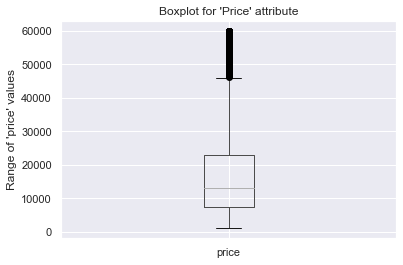

In [9]:
try:
    # Plotting boxplot to see if any outliers present in 'price' attribute
    
    ax = data.boxplot('price')
    ax.set_title("Boxplot for 'Price' attribute")
    ax.set_ylabel("Range of 'price' values")

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

I have plotted boxplot for year attribute and there are no outliers and this is evident from the boxplot displayed in the below cell.

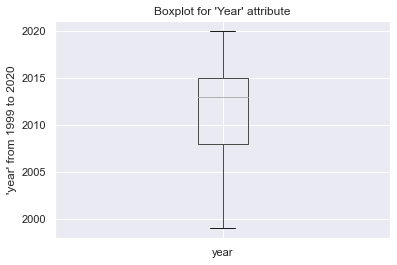

In [10]:
try:
    # Plotting boxplot to see if any outliers present in 'year' attribute
    
    ax = data.boxplot('year')
    ax.set_title("Boxplot for 'Year' attribute")
    ax.set_ylabel("'year' from 1999 to 2020")

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

I have plotted boxplot for odometer feature and there are some outliers that are above 250000 and this is evident from the boxplot displayed in the below cell.

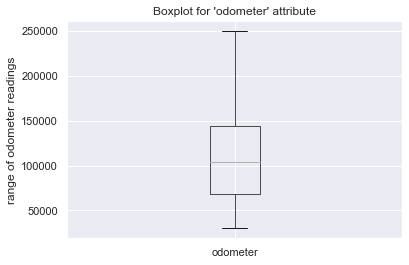

In [11]:
try:
    # Plotting boxplot to see if any outliers present in 'odometer' attribute
    
    ax = data.boxplot('odometer')
    ax.set_title("Boxplot for 'odometer' attribute")
    ax.set_ylabel("range of odometer readings")

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

Removing outliers in 'Price' feature:

In the below code, I have used IQR (Interquartile Range) to detect the outliers present in the data. IQR is the range between the first and third quartiles where Q1 represents the 25th percentile of data, Q2 represents the 50th percentile of data and Q3 represents 70th percentile of data. Hence the IQR is (Q3-Q1). Here for price attribute I took Q1 to be 30% and Q3 to be 70% of the data and the outliers will be (Q1-1.5(IQR)) that is the low range of outliers and (Q3+1.5(IQR)) this will be the upper range of outliers. Hence, I have filtered the price attribute within the specified range. Then, I have plotted boxplot to show the price feature without any outliers.

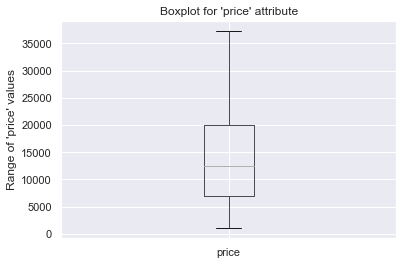

In [12]:
try:
    # Computing IQR
    Q1 = data['price'].quantile(0.30)
    Q3 = data['price'].quantile(0.70)
    IQR = Q3 - Q1

    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    data = data.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
    ax = data.boxplot('price')
    ax.set_title("Boxplot for 'price' attribute")
    ax.set_ylabel("Range of 'price' values")

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

Correlation between the numerical features:

I have plotted correlation values for each numerical values in the dataset. I see that year and price are correlated because the correlation value is greater than 0.5. Similarly, I can observe that odometer and price are correlated.

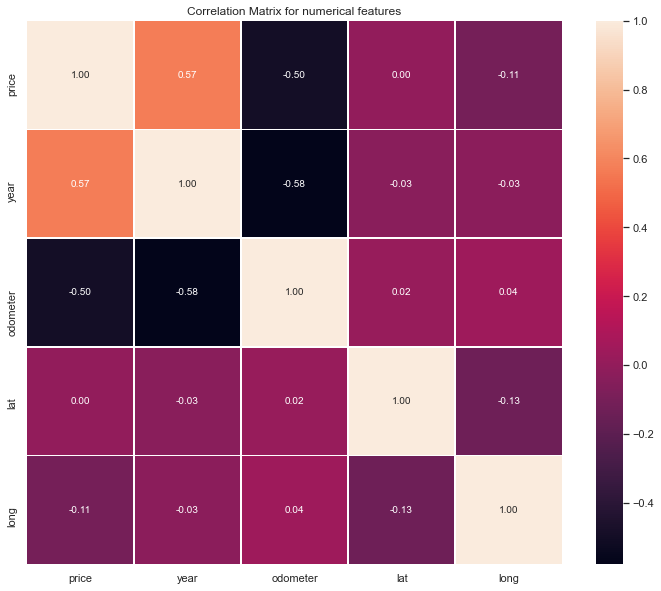

In [13]:
try:
    correlation_matrix = data.corr()
    plot.figure(figsize=(12,10))
    sns.heatmap(data=correlation_matrix, annot = True, fmt='.2f', linewidths=.5)
    plot.title("Correlation Matrix for numerical features")
    plot.show()

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)  

I will drop the latitude and longitude column because it is not needed to predict the price of an used vehicle and it has less correlation value with respect to price.

In [14]:
try:
    # Dropping location values
    data = data.drop(columns = ['lat','long'])  
    
    # Seeing the first five rows of data
    print("First five rows: \n", data.head())
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

First five rows: 
     price    year manufacturer                        model   fuel  odometer  \
31  15000  2013.0         ford                    f-150 xlt    gas  128000.0   
32  27990  2012.0          gmc  sierra 2500 hd extended cab    gas   68696.0   
34  35000  2019.0       toyota                       tacoma    gas   43000.0   
38  32990  2017.0         jeep     wrangler unlimited sport    gas   30041.0   
40  30990  2016.0    chevrolet        colorado crew cab z71  other   34940.0   

   title_status transmission drive    type paint_color state  
31        clean    automatic   rwd   truck       black    al  
32        clean        other   4wd  pickup       black    al  
34        clean    automatic   4wd   truck        grey    al  
38        clean        other   4wd   other      silver    al  
40        clean        other   4wd  pickup        blue    al  


### Data Exploration

In the below cell, I have plotted the histogram for the numerical features in the dataset. I have specified the labels for each of the plot. From the plot, it is evident that the price range varies from 1000 to 35000 USD and the count value is high for 5000 to 1000 USD. The high count values for the year is from 2010 to 2015. The odometer value for 100,000 has high count values than the other values. And, also the distributions of the numerical features can be identified by using histogram plots.

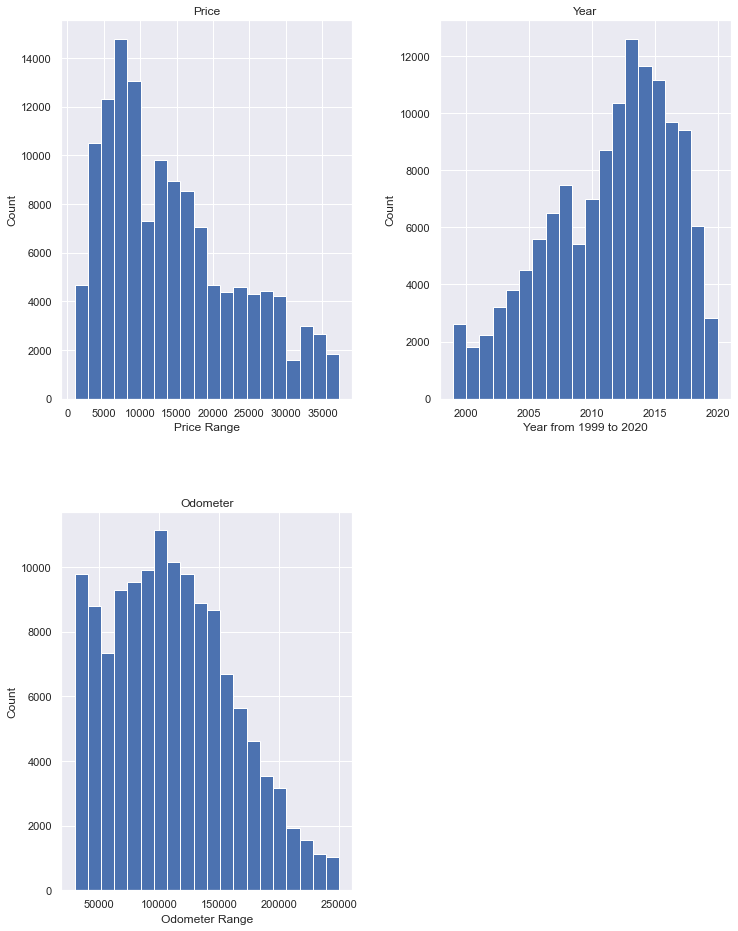

In [15]:
try:
    
    # Histogram for all the features
    ax = data.hist(bins = 20, figsize=(12,16))
    ax[0,0].set_title("Price")
    ax[0,0].set_xlabel("Price Range")
    ax[0,0].set_ylabel("Count")
    ax[0,1].set_title("Year")
    ax[0,1].set_xlabel("Year from 1999 to 2020")
    ax[0,1].set_ylabel("Count")
    ax[1,0].set_title("Odometer")
    ax[1,0].set_xlabel("Odometer Range")
    ax[1,0].set_ylabel("Count")
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

In the below code, I have plotted the distplot to see the distributions of price attribute. I can see that the price attribute doesn't have normal distribution. 

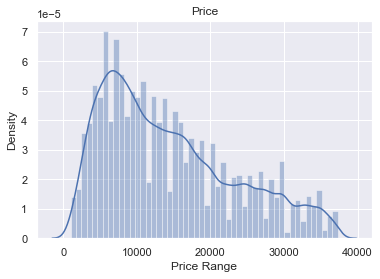

In [16]:
try:
    
    # Seeing the distribution of target data
    ax = sns.distplot(data["price"])
    ax.set_title("Price")
    ax.set_xlabel("Price Range")
    ax.set_ylabel("Density")
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

Removing duplicate values:

There are some duplicate values in the dataset and this can be found by duplicated() function in pandas. It helps in analysing the duplicate values and returns the boolean values. I have calculated the total values of the duplicate rows using sum() function. Then, I have printed the shape of the dataset without dropping the duplicate rows and dropped the duplicate values in the datset. Then, after dropping the duplicate values, I have 99415 instances of data with 12 features. 

In [17]:
try:
    # Checking duplicate values in data

    duplicate = data.duplicated()
    print("Duplicate row values: ",duplicate.sum())

    print("Shape of the dataset without dropping duplicate rows:", data.shape)

    # Dropping duplicate rows
    data = data[~duplicate]
    
    print("Shape of the dataset after dropping duplicate rows:", data.shape)
    print("")
    print("Checking the missing or invalid values: \n", data.isna().sum())
    print("")
    print("Information of data: \n")
    data.info()

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

Duplicate row values:  33184
Shape of the dataset without dropping duplicate rows: (132599, 12)
Shape of the dataset after dropping duplicate rows: (99415, 12)

Checking the missing or invalid values: 
 price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

Information of data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99415 entries, 31 to 426878
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         99415 non-null  int64  
 1   year          99415 non-null  float64
 2   manufacturer  99415 non-null  object 
 3   model         99415 non-null  object 
 4   fuel          99415 non-null  object 
 5   odometer      99415 non-null  float64
 6   title_status  99415 non-null  object 
 7   transmission  99415 non-null  object 
 8 

### Exploring categorical features

In the below code, I have plotted barplot to show the relationship between price and fuel attribute. The figure represents the price range values for different fuel types. That is, if I take 'diesel' fuel vehicles has a price range of 14k to 29k USD price range that is higher than the other types of fuel vehicles. Hence, diesel fuel vehicles has higher price range when compared to others. 

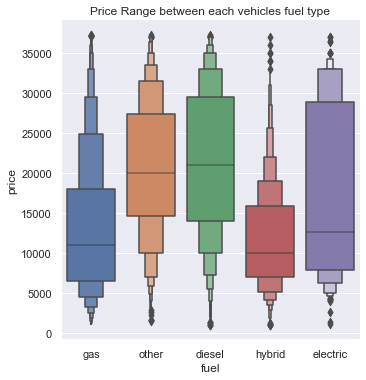

In [18]:
try:
    # Plotting barplot 
    ax = sns.catplot(x="fuel", y="price", kind = 'boxen',data=data)
    plot.title("Price Range between each vehicles fuel type")
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

In the below cell, I have plotted the relation between price and transmission of each vehicle. From this relationship I can see that manual, automatic and other type of vehicles has the same price range values but the mean range has been distributed differently for different transmission types.

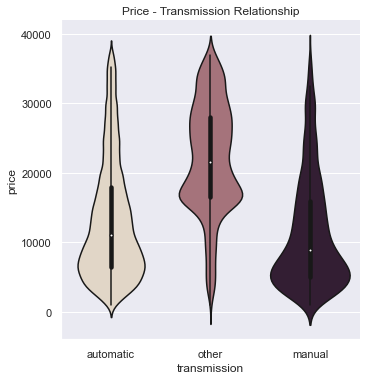

In [19]:
try: 
    # Plot for transmission and price values
    ax = sns.catplot(x="transmission", y="price",kind="violin", palette="ch:.25", data=data)
    plot.title("Price - Transmission Relationship")
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

in the below cell, I have plotted the boxplot for manufacturer and price attribute. This gives me an idea about prices based on different manufacturer.

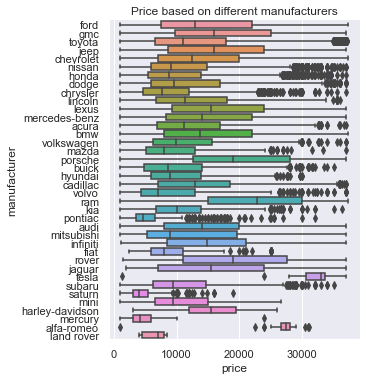

In [20]:
try:
    # Plot for manufacturer and price
    ax = sns.catplot(y="manufacturer", x="price", kind="box", data=data)
    plot.title("Price based on different manufacturers")
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

As I have done the cleaning process, now I have a cleaned dataset. I am resetting the index from 0 using reset_index() function. Then, I have displayed the whole data. 

In [21]:
try:
    # Resetting index
    data.reset_index(drop=True, inplace=True)

    print("Cleaned used vehicles data: \n",data)
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

Cleaned used vehicles data: 
        price    year manufacturer                        model   fuel  \
0      15000  2013.0         ford                    f-150 xlt    gas   
1      27990  2012.0          gmc  sierra 2500 hd extended cab    gas   
2      35000  2019.0       toyota                       tacoma    gas   
3      32990  2017.0         jeep     wrangler unlimited sport    gas   
4      30990  2016.0    chevrolet        colorado crew cab z71  other   
...      ...     ...          ...                          ...    ...   
99410   6950  2014.0       nissan                     altima s    gas   
99411   5950  2013.0       nissan                  rogue s awd    gas   
99412  32990  2016.0     infiniti        qx80 sport utility 4d    gas   
99413  33590  2018.0        lexus              gs 350 sedan 4d    gas   
99414  28990  2018.0        lexus              es 350 sedan 4d    gas   

       odometer title_status transmission drive    type paint_color state  
0      128000.0  

#### Encoding categorical variables

I have used OrdinalEncoder from scikit-learn to encode the categorical variables to integer values. Then, I have displayed the first five rows of the data. 

In [22]:
from sklearn.preprocessing import OrdinalEncoder

try:
    ord_enc = OrdinalEncoder()

    data[['manufacturer', 'fuel', 'title_status',
        'transmission','drive', 'model',
          'type', 'paint_color', 'state']]= ord_enc.fit_transform(data[['manufacturer', 
                                                                        'fuel', 'model',
                                                                        'title_status', 
                                                                        'transmission',
                                                                        'drive', 'type', 
                                                                        'paint_color', 
                                                                        'state']])

    print(data.head())
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

   price    year  manufacturer  model  fuel  odometer  title_status  \
0  15000  2013.0          10.0    2.0   2.0  128000.0        4206.0   
1  27990  2012.0          11.0    0.0   2.0   68696.0        8426.0   
2  35000  2019.0          35.0    0.0   2.0   43000.0        9142.0   
3  32990  2017.0          17.0    0.0   2.0   30041.0       10125.0   
4  30990  2016.0           6.0    0.0   4.0   34940.0        2623.0   

   transmission  drive  type  paint_color  state  
0           0.0    0.0  10.0          0.0    1.0  
1           0.0    2.0   8.0          0.0    1.0  
2           0.0    0.0  10.0          5.0    1.0  
3           0.0    2.0   7.0          9.0    1.0  
4           0.0    2.0   8.0          1.0    1.0  


In the below cell, I found the correlation for all the categorical features and independent features with the target feature using corr() function and analysed that 'state', 'paint_color', 'type' and title_status are not been correlated with the price attribute. 'year' and 'odometer' feature has correlation with 'price' with the value greater than 0.5. Other features has been less correlated.

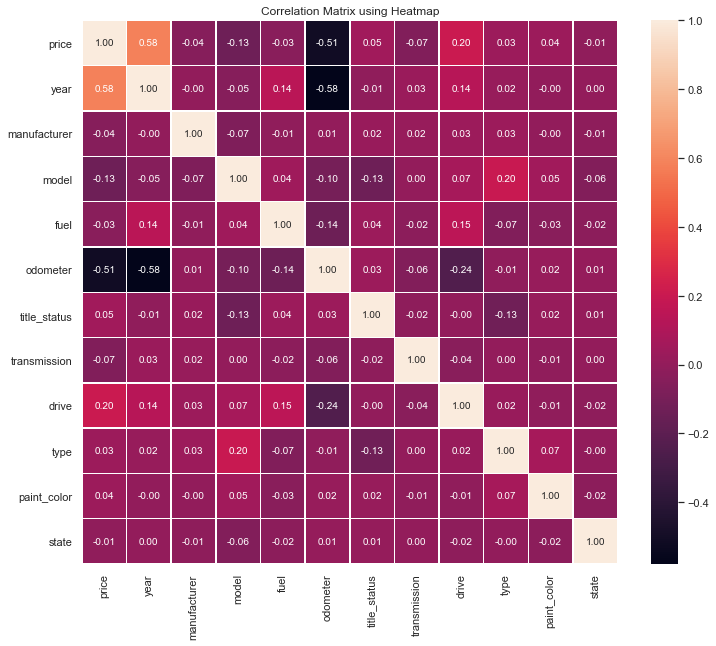

In [23]:
try:
    correlation_matrix = data.corr()
    plot.figure(figsize=(12,10))
    sns.heatmap(data=correlation_matrix, annot = True, fmt='.2f', linewidths=.5)
    plot.title("Correlation Matrix using Heatmap")
    plot.show()
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

From the correlation value, I see that 'state', 'paint_color','type','title_status' have been less correlated with 'price' feature. Hence, dropping the specified columns.

In [24]:
try:
    # Dropping columns that are not correlated with 'price' attribute
    data.drop(columns=['state', 'paint_color','type','title_status'], inplace=True)
    
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

<center>
    <h1> 3. Data Modelling </h1>
 </center>

I have selected Support Vector Regression Algorithm because it tries to fit the best line within a threshold value. The threshold value is the distance between the hyperplane and boundary line. Before data modelling, I have scaled the independent variables using StandardScaler() in scikit-learn. Then, I have splitted the data into train and test sets using KFold. To train the model, I have two cases. The first case is to train the model without tuning the hyperparameter values and evaluated the performance. The plot has been displayed for predicted and actual prices value. The second case is to train the model by tuning its hyperparameter values and evaluated the performance of the model. I have plotted the scatter plot showing the predicted values against the true values.


In the below code, I have scaled the data using StandardScaler. I am doing this because if I consider 'year' and 'odometer' feature, maximum number for year is 2020 and maximum odometer value is 250000. If I don't scale the data, then a small change in odometer value will have a greater impact than the same change in year. I am doing PCA (Principal Component Analysis) for the independent features ie. X because to reduce the dimensionality of the selected features. The number of correlated variables is less, hence I have taken weakly correlated features. PCA removes redundant information by removing the correlated features, creates new independent variables that are independent of each other. I have taken only 15000 samples for training from the larger sample since I have 99498 rows of values.

In [25]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

try:
    # Taking the first 10000 rows to train the model faster

    # Seperate independent features and target feature

    X = data.drop('price',axis=1)
    y = data.price

    X = X[:10000]
    y = y[:10000]
    print("Shape of X: ",X.shape)
    print("Shape of y: ",y.shape)
    
    # Scaling the data
    X = StandardScaler().fit_transform(X)
#     y = np.array(y).reshape(-1,1)
#     y = StandardScaler().fit_transform(y)
#     y = np.log(y)
    pca = PCA()
    pca = pca.fit(X)
    # summarize components
    print('Components \n', pca.components_)

    print('Explained variance \n', pca.explained_variance_)
    
    X = pca.transform(X)
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

Shape of X:  (10000, 7)
Shape of y:  (10000,)
Components 
 [[-0.60244096  0.04911233  0.00153621 -0.31226818  0.62307753  0.02894121
  -0.3848063 ]
 [ 0.10229461  0.66918845 -0.69382493 -0.20961599 -0.02365661  0.10920152
   0.06249899]
 [ 0.11159341  0.02084214  0.20920426 -0.14415343 -0.15213262  0.91971661
  -0.23139339]
 [-0.27969     0.52317896  0.34319823  0.57059167  0.19719867  0.1602471
   0.37434069]
 [ 0.05815377  0.39782751  0.56544932 -0.6342489  -0.1955797  -0.24075552
   0.14188787]
 [-0.27189661 -0.34218665 -0.16644999 -0.32551609  0.0741498   0.23694219
   0.78337374]
 [-0.67720861  0.01630159 -0.09805417  0.06294656 -0.71093846 -0.03968416
  -0.14330929]]
Explained variance 
 [1.85023468 1.11733816 1.02030867 0.94679389 0.87438111 0.83012604
 0.36151752]


<center>
    <h1> 4. Split the dataset into Training and Testing data </h1>
</center>

### 4. Data Segregation (Splitting)

In this step, I will split the data into training and test set using the KFold cross validator. It provides train and test indices to split data in train and test sets. It splits the dataset into k consecutive folds. That is, each fold is then used once as a testing set while the k - 1 remaining folds form the training set. I have splitted the data here into 10 folds and displayed the shpe of the testing and training sets.

In [26]:
from sklearn.model_selection import KFold

try:
    kf = KFold(n_splits=10)
    kf.get_n_splits(X, y)

    for train_index, test_index in kf.split(X, y):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
    print('Training dataset: X_train=', X_train.shape, ', y_train', y_train.shape)
    print('Testing dataset: X_test=', X_test.shape, ', y_test', y_test.shape)
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

Training dataset: X_train= (9000, 7) , y_train (9000,)
Testing dataset: X_test= (1000, 7) , y_test (1000,)


### 5. Model Training:
<b> Case 1: Without Tuning the Model parameters </b>

At first, I have calculated the naive baseline value and found the naive baseline Root Mean Square Value and having this value as the baseline for the model. I have fitted the model without tuning the hyperparmeters. The naive RMSE value is 8424.54.

### 6. Candidate Model Evaluation:
###### Without Tuning the model hyperparameters

I have predicted the model using the testing data. I have calculated Mean Absolute Error (MAE) which is an error between paired observations. The MAE for the model is 6446.42.The Mean Square Error (MSE) is the sqaure of the difference between actual and estimated values. The MSE for the model is 63278879.50. The Root Mean Square Error (RMSE) is the square root of the mean square error values. The RMSE value for the model is 7954.80. Then, I have plotted the predicted versus true values using scatter plot for the untuned model. From the below plot, I can see that the price feature predicted for both the actual values in x-axis and predicted values in y-axis and found that the model has not performed well. This may be because the model hyperparameter values is not tuned. Here, the model performance in training is very poor and the RMSE value for the training set is 8704.28 which is greater than the baseline RMSE value. The model predicts high error values, thus the RMSE value is 7954.80. The perfect prediction is the green diagonal line plotted to show how the actual versus predicted values deviate from the actual values.

The naive baseline RMSE is  8424.54089304537

Mean Absolute Error:  6446.429725072564

Mean Square Error:  63278879.50379183

RMSE Value:- 
 The model performance in training is  8704.282152943311
The model performance in testing is  7954.8022919361


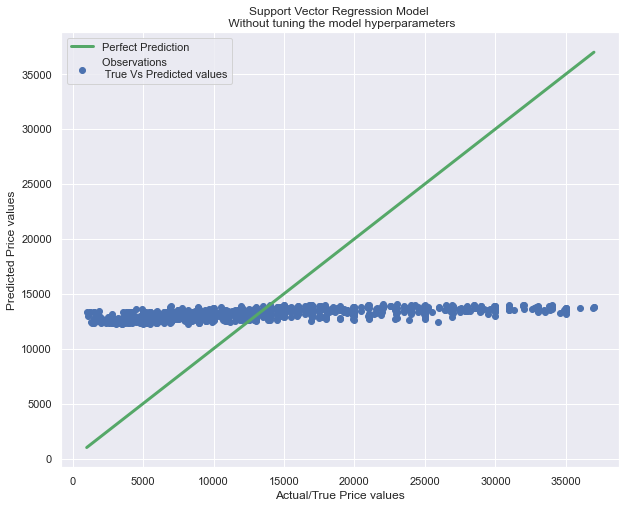

In [27]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

try:
    
    # Calculating naive baseline value
    baseline = np.mean(y)
    y_baseline = np.repeat(baseline, len(y_test))


    naive_RSME = mean_squared_error(y_test, y_baseline)
    naive_RSME=np.sqrt(naive_RSME)
    print("The naive baseline RMSE is ",naive_RSME)
    print("")
    
    model = SVR()
    
    # Fitting the model
    model.fit(X_train,y_train)
    
    # Predicting a model
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    
    # Evaluating performance of model
    print("Mean Absolute Error: ",mean_absolute_error(y_test, pred))
    print("")

    print("Mean Square Error: ", mean_squared_error(y_test, pred))
    print("")
    
    RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    RMSE_value = np.sqrt(mean_squared_error(y_test, pred))
    
    
    print('RMSE Value:- \n The model performance in training is ', RMSE)
    print('The model performance in testing is ', RMSE_value)
    
    plot.figure(figsize = (10, 8))
    # Scatter plot for true vs predicted values
    plot.scatter(y_test, pred, label="Observations \n True Vs Predicted values")
    
    plot.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], color='g', label ="Perfect Prediction", lw=3)
    plot.title("Support Vector Regression Model \n Without tuning the model hyperparameters")
    plot.xlabel("Actual/True Price values")
    plot.ylabel("Predicted Price values")
    plot.legend()

except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)   

<center>
<h1> 5. Hyper parameter model tuning </h1>
</center>

<b> Case 2: Tuning the Model hyperparameters </b>

###  Model Training:
###### Tuning the model hyperparameters

Here, I have to tune the model hyperparameter values. I have used RandomSearchCV to tune the hyperparameters. At first, I have imported RandomSearchCV and used this function to perform hyperparameter tuning to determine the optimal values for a given model. I have tuned the hyperparameters available in Support Vector Regressor (SVR) i.e. I have tuned for kernel, gamma, C and epsilon. kernel is the specific type of kernel that can be used in an algorithm. The kernel can be linear, radial basis function (rbf), poly and sigmoid. gamma is the kernel's coefficient value that is for poly, rbf and sigmoid kernels. C is the regularisation parameter that is an important hyperparameter for SVR. epsilon is the margin of tolerance where no penalty is given to errors. I have used the model for the RandomSearchCV function, passed the hyperparameters to tune, cv value is the number of cross-validation that I have to try for each selected set of hyperparameters and I have kept the value as 2, and I have set verbose as 1 to get the detailed print out while fitting the data to RandomSearchCV. I have fitted the model based on the hyperparameter tuning. I have displayed the best parameters for this model. 

In [28]:
from sklearn.model_selection import RandomizedSearchCV
try:
    
    # Hyperparameter tuning
    
    params = { 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
               'gamma': [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4], 
               'C': [1, 2, 10, 100, 200, 500], 
               'epsilon': [0.1,0.2,0.3,0.5,0.6]
             }


    svr = RandomizedSearchCV(model, params, cv = 2, n_iter = 10, 
                                n_jobs = -1, verbose = 2, random_state=42)

    svr.fit(X_train,y_train)
    print("Best hyperparameter values: ",svr.best_params_)



except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best hyperparameter values:  {'kernel': 'linear', 'gamma': 0.01, 'epsilon': 0.6, 'C': 500}


<center>
<h1> 6. Model Performance – Evaluation </h1>
</center>

###  Candidate Model Evaluation:
###### Tuning the model hyperparameters

In this step, I will measure the RMSE (Root Mean Square Error) of the model using the metrics in sklearn. After fitting the model, I predicted the model for the testing data using Support Vector Regressor and tuning its hyperparameter values. Here, I have calculated the regressor baseline and the regressor baseline RMSE value is 8238.85. And, I have calculated the model performance for the testing sets. I have calculated mean_absolute_error and the error value is 4859.63. The mean_squared_error value is 41629471.16. The model performance (RMSE value) in testing is 6452.09. Thus, the testing rmse value has been less when compared to the naive and regression baseline rmse value for this model. 

The regressor baseline RMSE value is  8238.850507079249
Mean Absolute Error:  4859.632436804036

Mean square error:  41629471.16184769

RMSE Value:- 
 The model performance in training is  6919.857112183163
The model performance in testing is  6452.090448982228


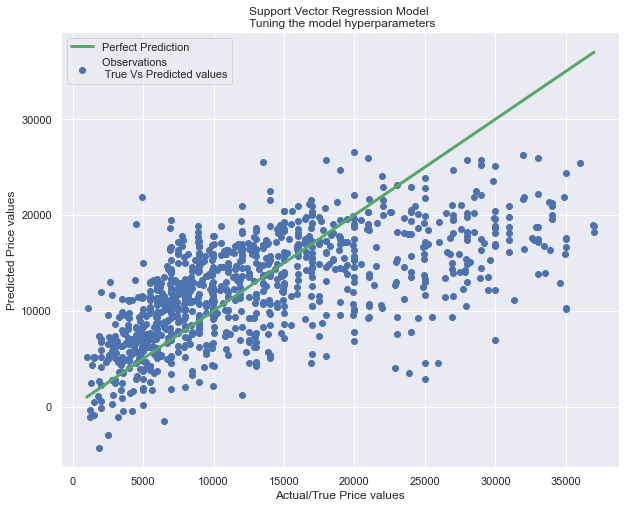

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
try:
    # Prediction
    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)
    
    # Regression baseline
    
    dummy_regr = DummyRegressor(strategy="median")
    dummy_regr.fit(X_train, y_train)

    ybaseline = dummy_regr.predict(X_test)

    regressor_RSME = mean_squared_error(y_test, ybaseline)
    regressor_RSME = np.sqrt(regressor_RSME)
    print("The regressor baseline RMSE value is ",regressor_RSME)

    # Checking accuracy of model
    print("Mean Absolute Error: ",mean_absolute_error(y_test, y_test_pred))
    print("")
    print("Mean square error: ", mean_squared_error(y_test, y_test_pred))
    print("")
    RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print('RMSE Value:- \n The model performance in training is ', RMSE_train)
    print('The model performance in testing is ', RMSE_test)
    
    plot.figure(figsize = (10, 8))
    # Scatter plot for true vs predicted values
    plot.scatter(y_test, y_test_pred, label="Observations \n True Vs Predicted values")
    plot.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], color='g', label ="Perfect Prediction", lw=3)
    plot.title("Support Vector Regression Model \n Tuning the model hyperparameters")
    plot.xlabel("Actual/True Price values")
    plot.ylabel("Predicted Price values")
    plot.legend()
    
except Exception as e:
    # traceback prints out the errors for you to see
    traceback.print_stack(e)
    # capture_exception sends your issue to Sentry
    sentry_sdk.capture_exception(e)

From the above plot, I can see that the price feature predicted for both the actual values in x-axis and predicted values in y-axis and from the plot, it is evident that the performance is better than the model that has not been tuned. The price range with less error value varies from 3000 to 20000. Above that range, the model predicts high error values, thus the RMSE value is 6452.09. The perfect prediction is the green diagonal line plotted to find how the actual versus predicted values deviate from the actual values.